In [1]:
from laserembeddings import Laser
import numpy as np
from indicnlp.tokenize import sentence_tokenize
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, BisectingKMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pickle as pk
from embedder import Embedder
from matplotlib.font_manager import FontProperties
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer

laser = Laser()
embedder = SentenceTransformer('distiluse-base-multilingual-cased')
pca_1 = PCA(n_components=2)
pca_2 = PCA(n_components=2)

ModuleNotFoundError: No module named 'embedder'

In [2]:
path = "Articles Dataset/"
langs = ["English/", "Nepali/", "Hindi/"]

class Article:
    emb = None
    pca_emb = None

    def __init__(self, text, lang, cat, fname):
        self.text = text
        self.lang = lang
        self.cat = cat
        self.fname = fname

    def sen_split(self):
        self.text = sentence_tokenize.sentence_split(self.text, lang=self.lang)

articles = []

for lang in langs:
    categories = [f for f in os.listdir(path + lang) if os.path.isdir(os.path.join(path + lang, f))]
    for category in categories:
        for filename in os.listdir(path + lang + category):
            if filename[:-4] != "metadata":
                with open(os.path.join(path + lang + category, filename), 'r') as file:
                    articles.append(Article(file.read(), lang[:3].lower(), category.lower(), filename.lower()))

model = SentenceTransformer('LaBSE')

for article in articles:
    article.sen_split()
    article.emb = np.mean(model.encode(article.text), axis=0)

embedding_space = []

for article in articles:
    embedding_space.append(article.emb)

embedding_space = np.array(embedding_space)
pca = PCA(n_components=2)
pca.fit(embedding_space)
for article in articles:
    article.pca_emb = pca.transform(article.emb.reshape(1, -1))

color_dict = {
    'sports': '#FF5733',  # orange
    'politics': '#6B8E23',  # olive green
    'entertainment': '#BA55D3',  # medium purple
    'economics': '#1E90FF',  # dodger blue
    'crime': '#FF1493'  # deep pink
}

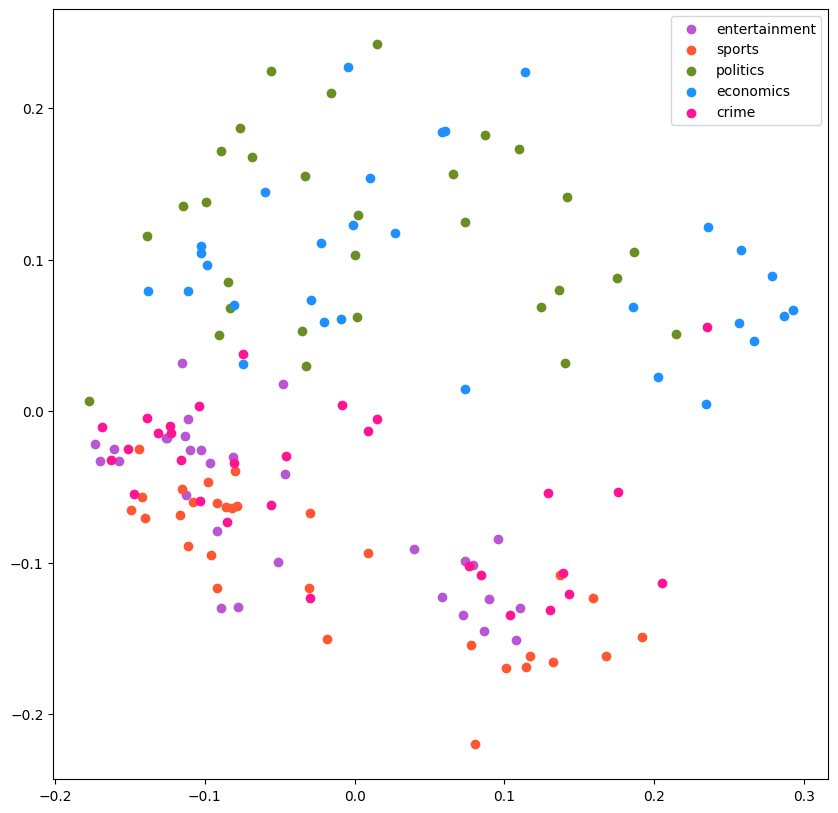

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.subplots()

emb_by_cat = {}

for article in articles:
    category = article.cat
    if category not in emb_by_cat:
        emb_by_cat[category] = []
    emb_by_cat[category].append(article.pca_emb)

for category, pca_embs in emb_by_cat.items():
    x = [pca_emb[0][0] for pca_emb in pca_embs]
    y = [pca_emb[0][1] for pca_emb in pca_embs]
    color = color_dict[category]
    ax.scatter(x, y, color=color, label=category)

ax.legend()

plt.show()

In [22]:
real = []
cats = {"entertainment": 0,
        "sports": 1,
        "politics": 2,
        "crime": 3,
        "economics": 4}
for a in articles:
    real.append(cats[a.cat])
real = np.array(real)

In [37]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(embedding_space)

clusters = {}

for i in range(len(labels)):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(articles[i])

# for cluster, arcls in clusters.items():
#     print(f"Cluster {cluster}:")
#     for article in arcls:
#         print(article.lang + ":" + article.cat + ":" + article.fname)
#     print("\n")

print(adjusted_mutual_info_score(list(labels), list(real)))
print(adjusted_rand_score(list(labels), list(real)))

0.8455230046950623
0.8379456879294023


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
bisect_means = BisectingKMeans(n_clusters=5)
labels = bisect_means.fit_predict(embedding_space)

clusters = {}

for i in range(len(labels)):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(articles[i])

# for cluster, arcls in clusters.items():
#     print(f"Cluster {cluster}:")
#     for article in arcls:
#         print(article.lang + ":" + article.cat + ":" + article.fname)
#     print("\n")

print(adjusted_mutual_info_score(list(labels), list(real)))
print(adjusted_rand_score(list(labels), list(real)))

0.5355395422633211
0.42678180582219666


In [40]:
agg = AgglomerativeClustering(n_clusters=5)
labels = agg.fit_predict(embedding_space)

clusters = {}

for i in range(len(labels)):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(articles[i])

# for cluster, arcls in clusters.items():
#     print(f"Cluster {cluster}:")
#     for article in arcls:
#         print(article.lang + ":" + article.cat + ":" + article.fname)
#     print("\n")

print(adjusted_mutual_info_score(list(labels), list(real)))
print(adjusted_rand_score(list(labels), list(real)))

0.5913594279758863
0.46009517736091093


In [41]:
spec = SpectralClustering(n_clusters=5)
labels = spec.fit_predict(embedding_space)

clusters = {}

for i in range(len(labels)):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(articles[i])

# for cluster, arcls in clusters.items():
#     print(f"Cluster {cluster}:")
#     for article in arcls:
#         print(article.lang + ":" + article.cat + ":" + article.fname)
#     print("\n")

print(adjusted_mutual_info_score(list(labels), list(real)))
print(adjusted_rand_score(list(labels), list(real)))

0.6643321395560821
0.5557611952392265


In [42]:
dbscan = DBSCAN(eps=0.375)
labels = dbscan.fit_predict(embedding_space)

clusters = {}

for i in range(len(labels)):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(articles[i])

# for cluster, arcls in clusters.items():
#     print(f"Cluster {cluster}:")
#     for article in arcls:
#         print(article.lang + ":" + article.cat + ":" + article.fname)
#     print("\n")

print(adjusted_mutual_info_score(list(labels), list(real)))
print(adjusted_rand_score(list(labels), list(real)))

0.24737939498292455
0.0471252673737078
